In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

In [48]:
raw_weather = pd.read_csv("/content/drive/MyDrive/제주 에너지 이노베이터/data/2021~2022 modified_weather_data.csv", encoding='euc-kr')

# API로 제공되는 열들만 추출하기

In [49]:
raw_weather.head()

,일자,거래시간,지역,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),...,일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C)
0,2021-01-01,1,제주,4.5,NaN,6.1,320.0,53.0,4.5,-4.2,...,NaN,NaN,9.0,9.0,Sc,NaN,2000.0,NaN,NaN,2.2
1,2021-01-01,2,제주,4.3,NaN,5.6,320.0,58.0,4.8,-3.2,...,NaN,NaN,9.0,9.0,Sc,10.0,2000.0,NaN,8.0,2.4
2,2021-01-01,3,제주,4.2,NaN,5.5,320.0,54.0,4.4,-4.3,...,NaN,NaN,10.0,10.0,NaN,11.0,2000.0,NaN,NaN,2.3
3,2021-01-01,4,제주,4.3,0.0,5.4,320.0,52.0,4.3,-4.7,...,NaN,NaN,10.0,7.0,ScAs,12.0,2000.0,NaN,NaN,2.2
4,2021-01-01,5,제주,4.2,NaN,4.2,290.0,47.0,3.9,-6.1,...,NaN,NaN,10.0,7.0,ScAs,12.0,2000.0,NaN,NaN,2.0


In [50]:
column_names = raw_weather.columns
print(column_names)

Index(['일자', '거래시간', '지역', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)',
       '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)'],
      dtype='object')


In [51]:
weather_df = pd.DataFrame(columns=['date', 'hour', 'WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature'])

weather_df['date'] = raw_weather['일자']
weather_df['hour'] = raw_weather['거래시간']
weather_df['WindDirection'] = raw_weather['풍향(16방위)']
weather_df['WindSpeed'] = raw_weather['풍속(m/s)']
weather_df['Cloud'] = raw_weather['전운량(10분위)']
weather_df['Rainfall'] = raw_weather['강수량(mm)']
weather_df['Humidity'] = raw_weather['습도(%)']
weather_df['Temperature'] = raw_weather['기온(°C)']
weather_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
0,2021-01-01,1,320.0,6.1,9.0,NaN,53.0,4.5
1,2021-01-01,2,320.0,5.6,9.0,NaN,58.0,4.3
2,2021-01-01,3,320.0,5.5,10.0,NaN,54.0,4.2
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3
4,2021-01-01,5,290.0,4.2,10.0,NaN,47.0,4.2
...,...,...,...,...,...,...,...,...
70075,2022-12-31,20,360.0,1.3,2.0,NaN,51.0,6.0
70076,2022-12-31,21,20.0,1.0,0.0,NaN,53.0,5.7
70077,2022-12-31,22,250.0,1.6,0.0,NaN,59.0,5.9
70078,2022-12-31,23,230.0,1.5,0.0,NaN,64.0,6.5


# 결측치 확인

처리는 태양광, 풍력, 전력과 합친 다음에 각각 진행하는게 나을듯

In [52]:
missing_values = weather_df.isnull().sum()
missing_values

date                 0
hour                 0
WindDirection       16
WindSpeed           14
Cloud              339
Rainfall         63019
Humidity             8
Temperature          7
dtype: int64

In [53]:
# 빈 값의 행 번호 찾기
missing_winddirection_indices = np.where(weather_df['WindDirection'].isnull())[0]
missing_windspeed_indices = np.where(weather_df['WindSpeed'].isnull())[0]
missing_cloud_indices = np.where(weather_df['Cloud'].isnull())[0]
missing_humidity_indices = np.where(weather_df['Humidity'].isnull())[0]
missing_temperature_indices = np.where(weather_df['Temperature'].isnull())[0]

# 출력
print("Missing WindDirection Indices:", missing_winddirection_indices)
print("Missing WindSpeed Indices:", missing_windspeed_indices)
print("Missing Cloud Indices:", missing_cloud_indices)
print("Missing Humidity Indices:", missing_humidity_indices)
print("Missing Temperature Indices:", missing_temperature_indices)

Missing WindDirection Indices: [ 9777 16862 16863 18368 18369 19769 40263 40264 44075 44076 45503 45504
 45785 45876 45877 45878]
Missing WindSpeed Indices: [ 9777 16862 16863 18368 18369 19769 40263 40264 45503 45504 45785 45876
 45877 45878]
Missing Cloud Indices: [  764  1129  3121  4411  4412  4414  4415  5467  8371  8515  9829  9889
 10644 10982 10983 10984 11004 11028 11029 11030 11052 11053 11054 11103
 11124 11797 11820 11822 11869 12086 12205 12206 12394 12757 12786 12928
 13056 13080 13092 13104 13128 13152 13168 13169 13170 13171 13172 13173
 13174 13175 13176 13474 13620 13621 13622 13725 13900 13901 13902 13903
 13904 13905 13932 14052 14064 14088 14112 14136 14160 14178 14179 14184
 14208 14221 14222 14224 14225 14227 14228 14230 14231 14233 14234 14236
 14237 14239 14316 14412 14436 14520 14544 14568 14592 14616 14640 14664
 14688 14770 14971 15180 15181 15182 15183 15184 15185 15186 15321 15368
 15369 15370 16313 16335 17148 17273 17275 17544 17568 17592 17616 17640
 17

# 시각화

<ipython-input-54-d37e83d44230>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-54-d37e83d44230>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-54-d37e83d44230>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-54-d37e83d44230>:13: FutureWarning: 

Passing `palette` witho

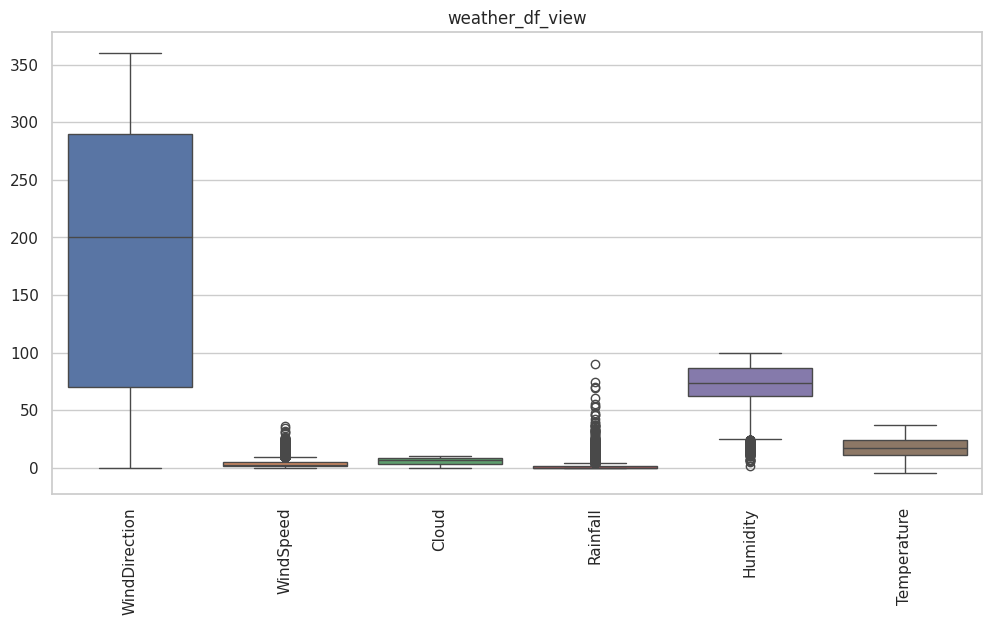

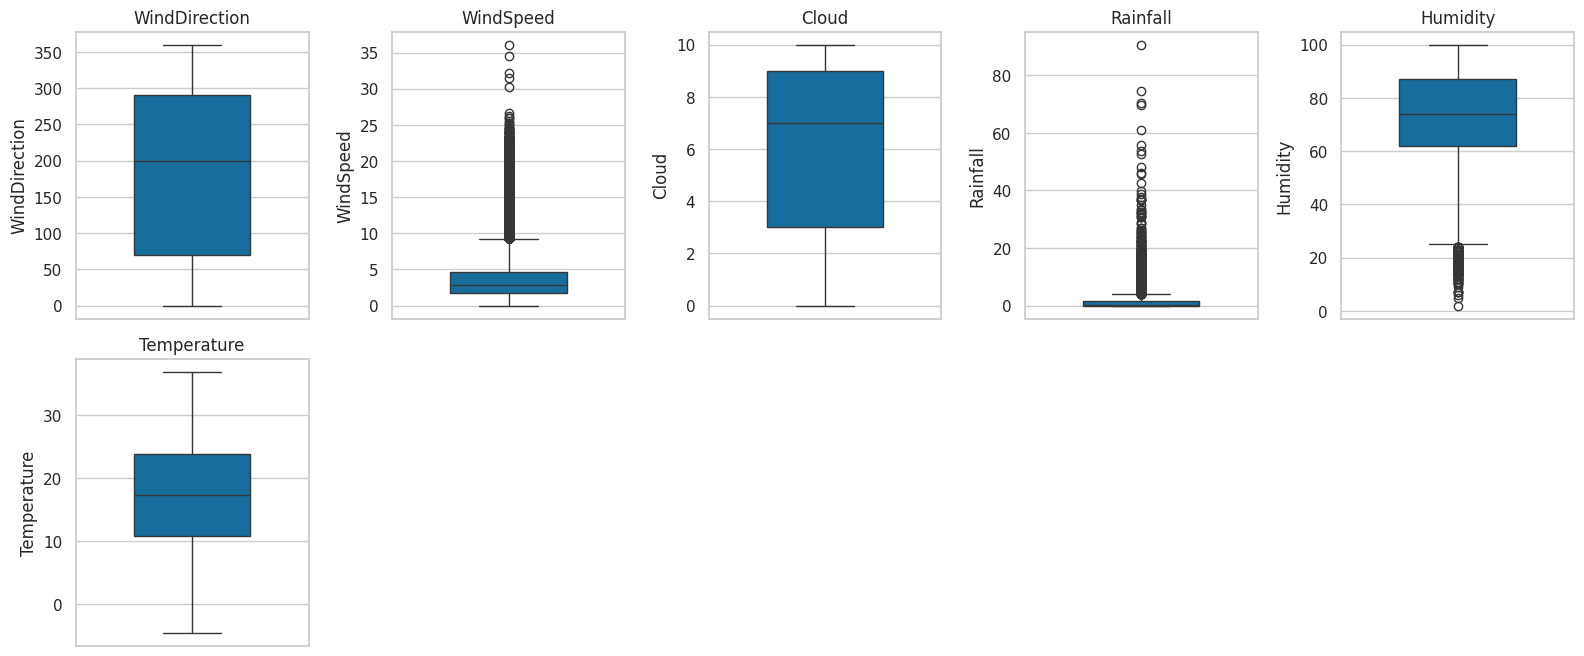

In [54]:
weather_df_view = weather_df.copy()
weather_df_view = weather_df_view.drop(['date', 'hour'], axis=1)

plt.figure(figsize=(12, 6))
plt.title('weather_df_view')
plt.xticks(rotation=90)
sns.boxplot(weather_df_view)

plt.figure(figsize=(16, 10))

for i, column in enumerate(weather_df_view.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=weather_df_view[column], orient="v", width=0.5, palette="colorblind")
    plt.title(column)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

<ipython-input-55-76901b1e2af8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view_sc[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-55-76901b1e2af8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view_sc[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-55-76901b1e2af8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=weather_df_view_sc[column], orient="v", width=0.5, palette="colorblind")
<ipython-input-55-76901b1e2af8>:16: FutureWarning: 

Passing `palet

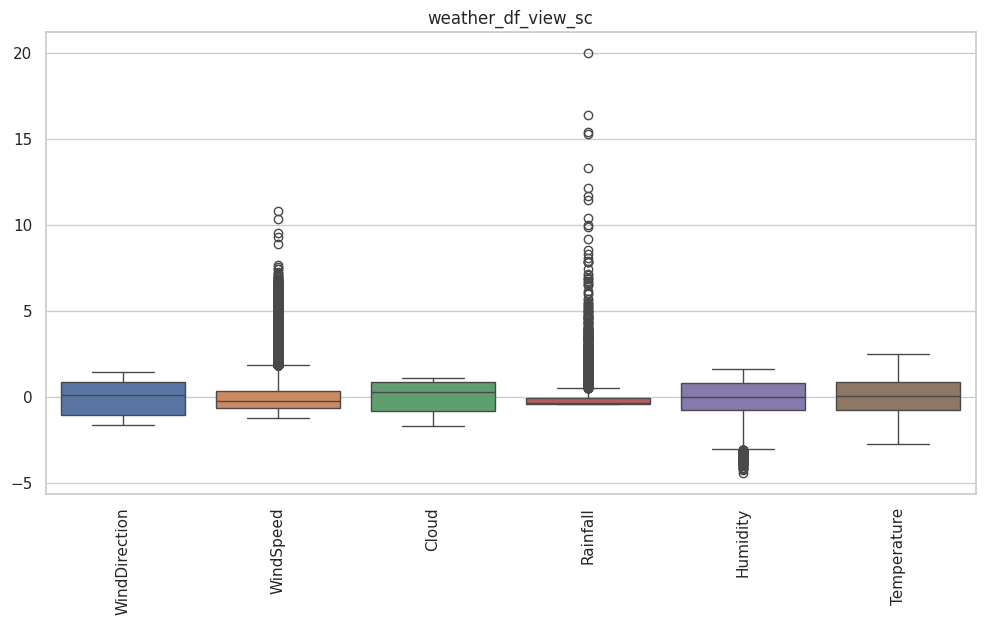

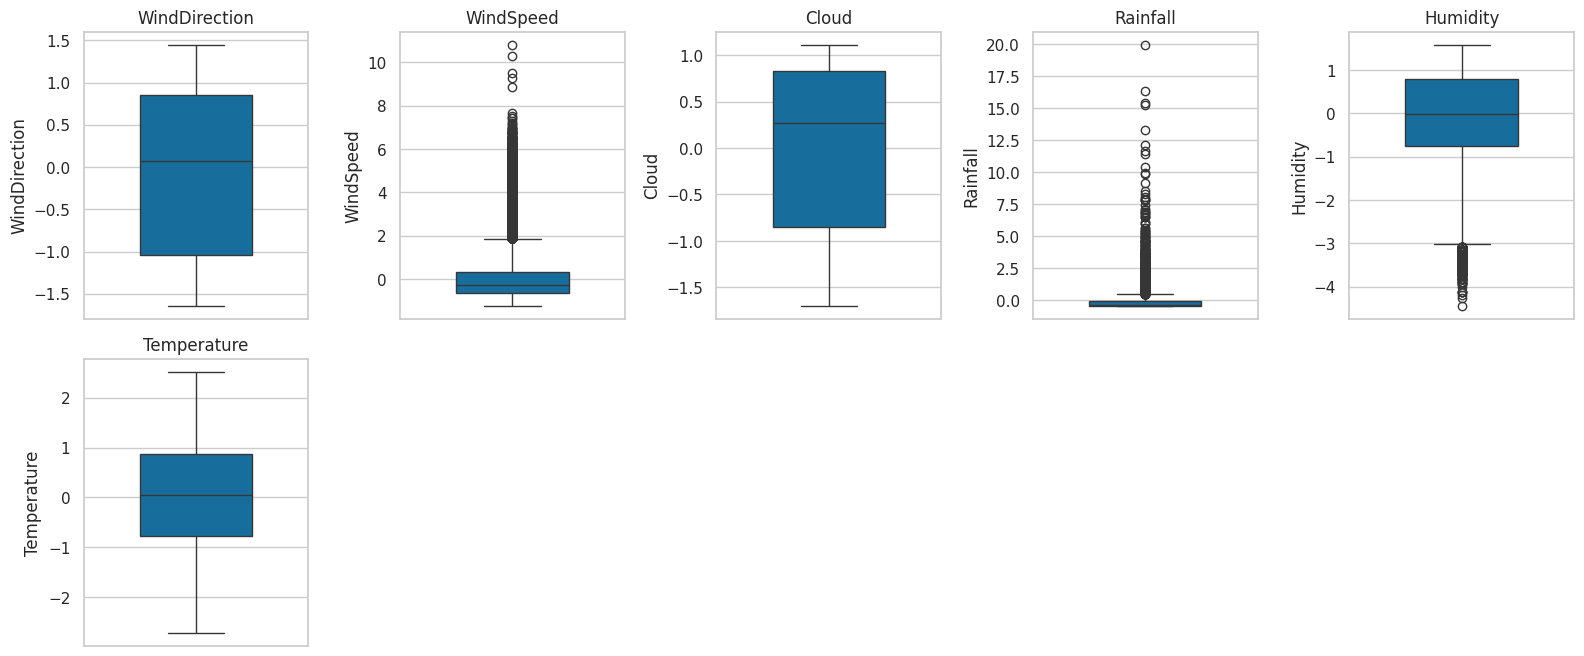

In [55]:
# df_met_view_sc boxplot
ss = StandardScaler()
ss.fit(weather_df_view)
weather_df_view_sc = ss.transform(weather_df_view)
weather_df_view_sc = pd.DataFrame(weather_df_view_sc, columns=['WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature'])

plt.figure(figsize=(12, 6))
plt.title('weather_df_view_sc')
plt.xticks(rotation=90)
sns.boxplot(weather_df_view_sc)

plt.figure(figsize=(16, 10))

for i, column in enumerate(weather_df_view_sc.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=weather_df_view_sc[column], orient="v", width=0.5, palette="colorblind")
    plt.title(column)

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

# 강수량 처리
기상청 기준 시간당 3까지는 약한비, 3부터 보통비.

따라서 0~3을 1, 3초과를 2, NAN(진짜비안온거)를 0으로 처리함

In [56]:
# Rainfall 열 값 변경
weather_df['Rainfall'] = np.where((weather_df['Rainfall'] > 0) & (weather_df['Rainfall'] <= 3), 1, weather_df['Rainfall'])
weather_df['Rainfall'] = np.where(weather_df['Rainfall'] > 3, 2, weather_df['Rainfall'])

# NaN 값을 0으로 대체
weather_df['Rainfall'].fillna(0, inplace=True)

In [57]:
weather_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
0,2021-01-01,1,320.0,6.1,9.0,0.0,53.0,4.5
1,2021-01-01,2,320.0,5.6,9.0,0.0,58.0,4.3
2,2021-01-01,3,320.0,5.5,10.0,0.0,54.0,4.2
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3
4,2021-01-01,5,290.0,4.2,10.0,0.0,47.0,4.2
...,...,...,...,...,...,...,...,...
70075,2022-12-31,20,360.0,1.3,2.0,0.0,51.0,6.0
70076,2022-12-31,21,20.0,1.0,0.0,0.0,53.0,5.7
70077,2022-12-31,22,250.0,1.6,0.0,0.0,59.0,5.9
70078,2022-12-31,23,230.0,1.5,0.0,0.0,64.0,6.5


# Feature extraction : 일사량

In [58]:
an = [1.000110,0.034221,0.000719]
bn = [0,0.001280,0.000077]
cn = [0.006918,-0.399912,-0.006758,-0.002697]
dn = [0,0.070257,0.000907,0.000148]


S = 1367 #solar constant
L = 33.3 #latitude
L_rad = np.deg2rad(L) #latitude를 rad으로 변환

weather_df['date'] = pd.to_datetime(weather_df['date'])
d = weather_df['date'].dt.dayofyear
t = 2*np.pi*d/365

In [59]:
LN = datetime.datetime(2024, 2, 9, 12, 0, 0) # local noon time

In [60]:
# sun-earth distance  : r0 값을 알 수 없어서, a로 근사한 식을 이용함
r0_r2 = np.zeros(t.shape)
for i in range(0,3) :
    r0_r2 = r0_r2+an[i]*np.cos(i*t)+bn[i]*np.sin(i*t)

# declination angle
delta_rad = np.zeros(t.shape)
for i in range(0,4) :
    delta_rad = delta_rad+cn[i]*np.cos(i*t)+dn[i]*np.sin(i*t)

In [61]:
# Solar insolation for hour gap
# Q12는 태양 남중 12시로 가정한거고, Q13은 남중 13시로 가정한검니당
Q = np.zeros(t.shape)
gap = np.pi/12
weather_df['Q12'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((weather_df.hour-12)*gap)))
weather_df['Q12'] = weather_df['Q12'].apply(lambda x: max(0, x))
weather_df['Q13'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((weather_df.hour-13)*gap)))
weather_df['Q13'] = weather_df['Q13'].apply(lambda x: max(0, x))
weather_df['Q_mean'] = (weather_df['Q12']+weather_df['Q13'])/2

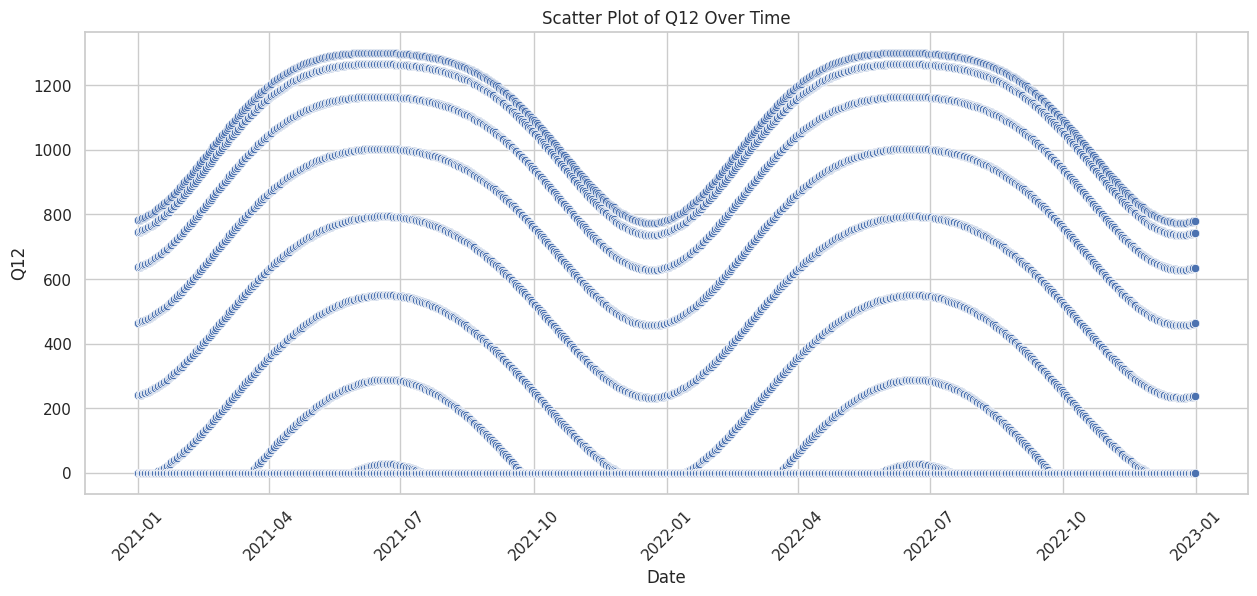

In [72]:
# Seaborn 스타일 설정 (optional)
sns.set(style="whitegrid")

# Scatter plot 그리기
plt.figure(figsize=(15, 6))
sns.scatterplot(x='date', y='Q12', data=weather_df)
plt.title('Scatter Plot of Q12 Over Time')
plt.xlabel('Date')
plt.ylabel('Q12')
plt.xticks(rotation=45)
plt.show()

# 데이터 다운받기

In [73]:
weather_df.to_csv('weather_df.csv', index=False)